## Notebook for analyzing myocyte results 

Below are examples for running single (mpi-based) jobs or performing a loop over some parameter (like the diffusion constant). I will be interested in knowing, for instance, how the cleft and cytosol calcium concentrations vary (e.g. peak amplitude or time-to-peak amplitude) as a function of various parameters. 


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import analyze
class empty:pass

In [3]:
# suppress debug comments (obviously reenable if code isn't working)
import logging
logging.getLogger("FFC").setLevel(logging.ERROR)


Ran the following, which calls the simpleCompare routine

<code>mpirun -np 24 python sachse.py -simpleCompare </code>

In [4]:
dt = 5 # [ms] # NOTE!!! This is dependent on what's in the simpleCompare routine


[ 0.3         0.37777778  0.45555556  0.53333333  0.61111111  0.68888889
  0.76666667  0.84444444  0.92222222  1.        ] [-6.         -5.77777778 -5.55555556 -5.33333333 -5.11111111 -4.88888889
 -4.66666667 -4.44444444 -4.22222222 -4.        ]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.]
[ 0.] [ 0.] [ 0.

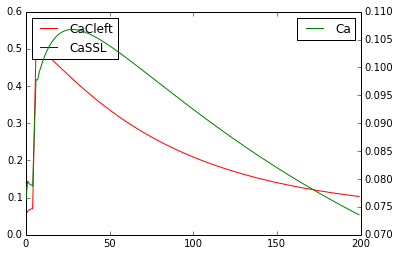

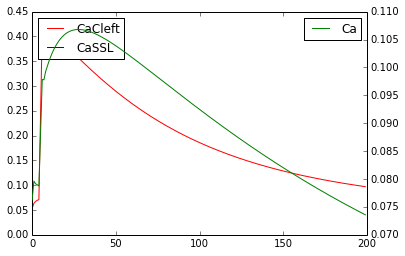

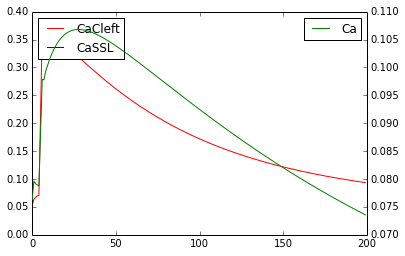

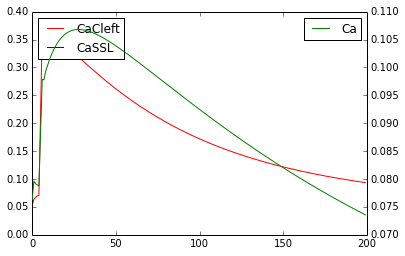

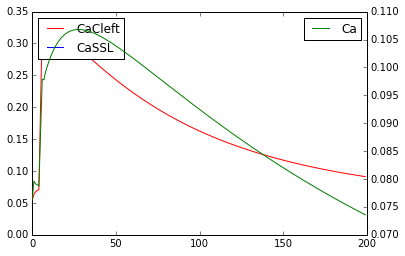

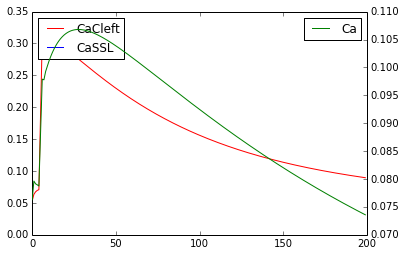

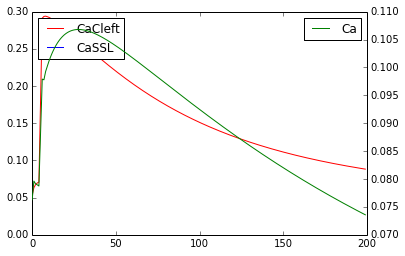

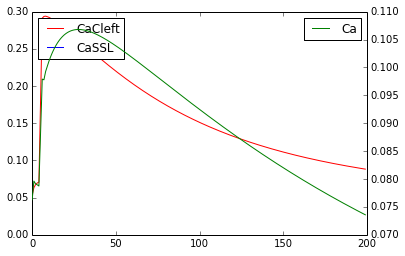

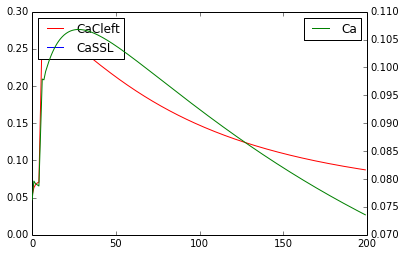

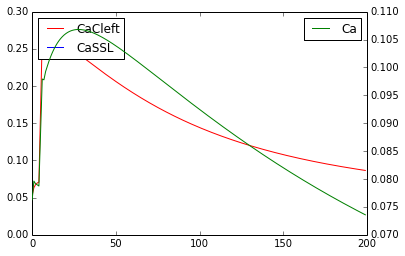

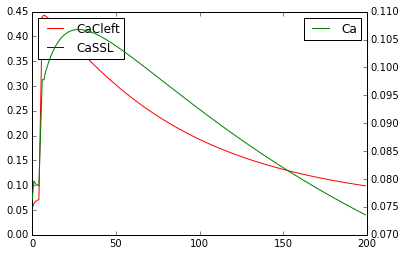

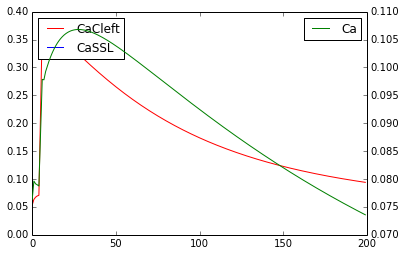

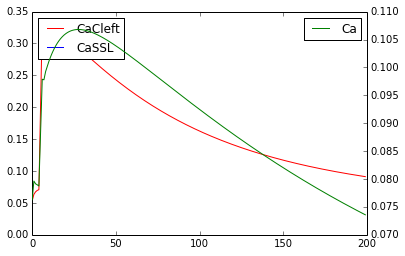

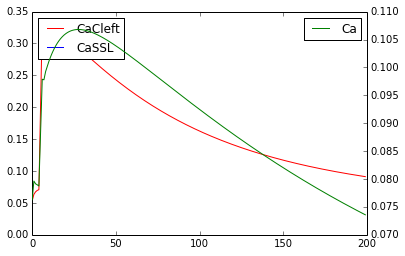

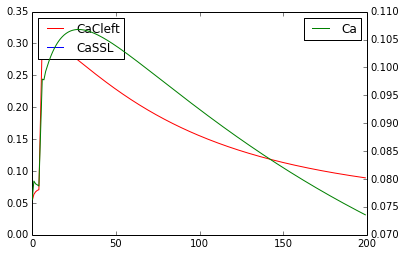

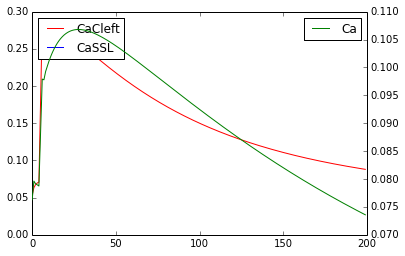

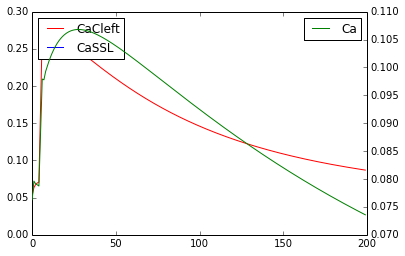

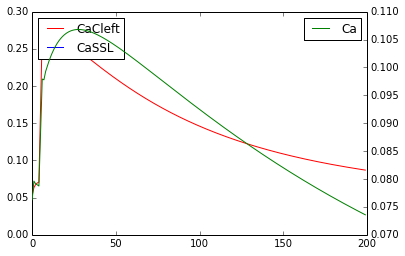

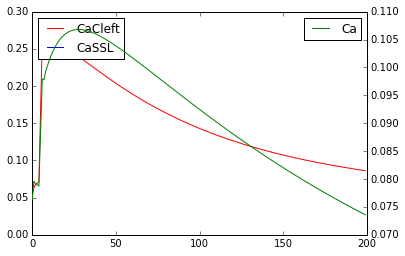

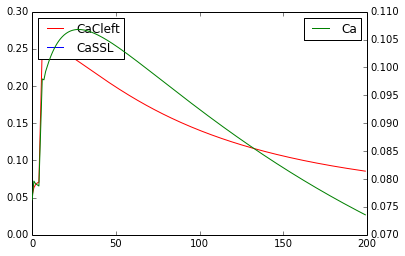

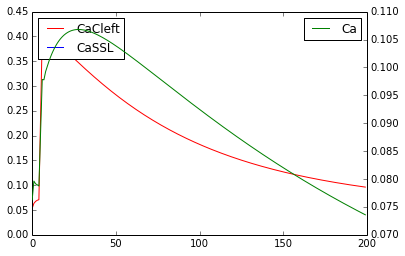

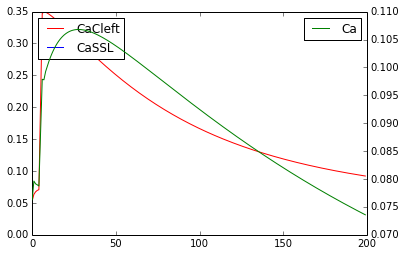

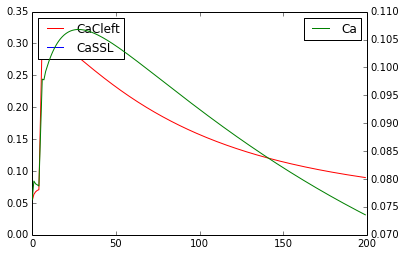

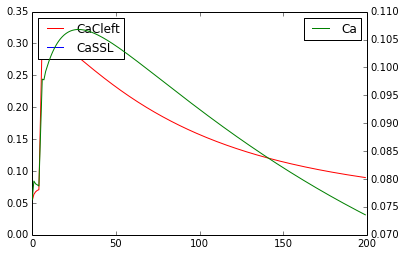

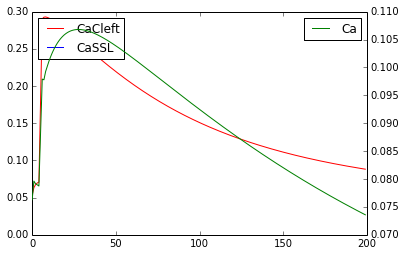

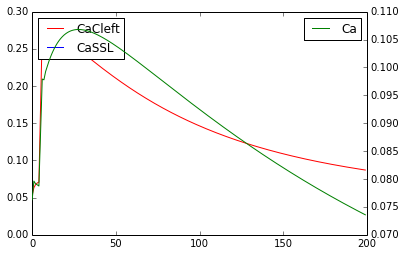

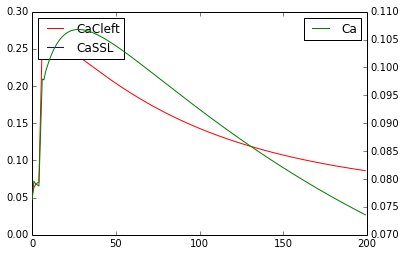

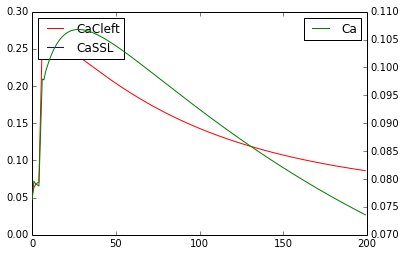

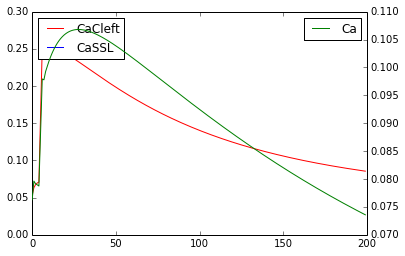

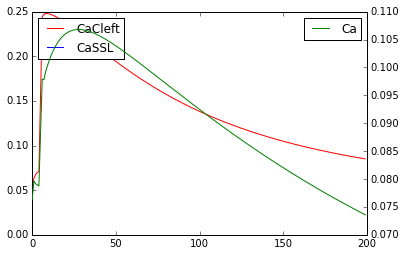

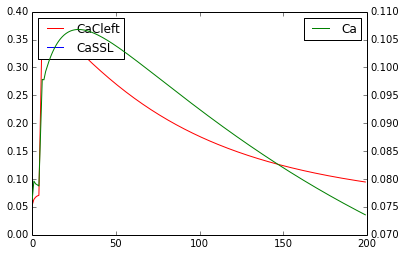

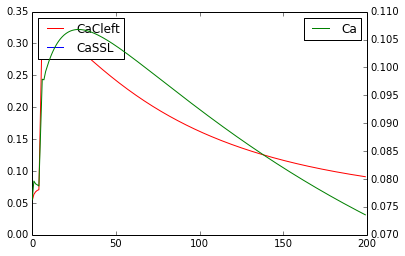

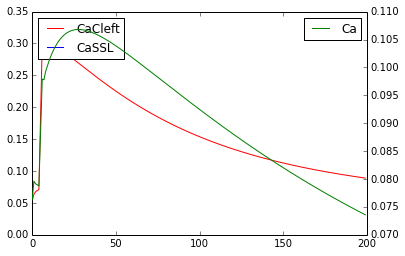

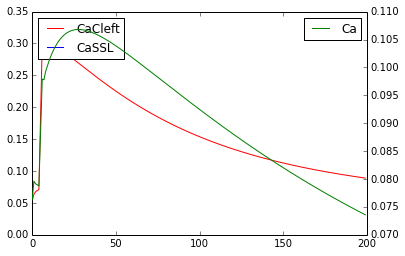

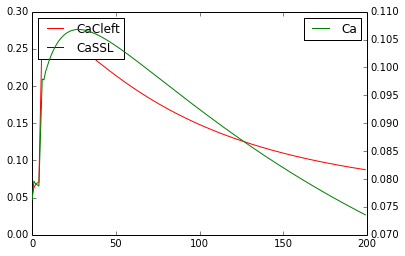

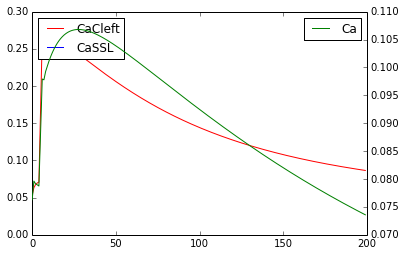

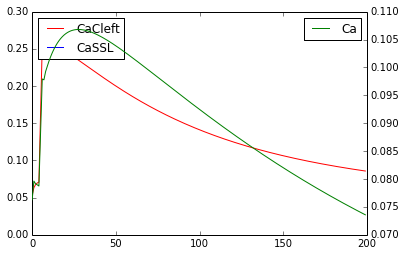

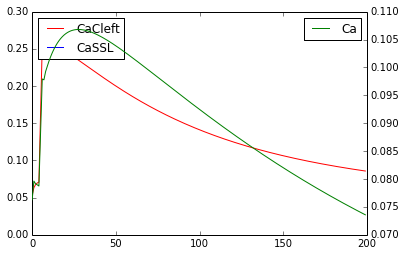

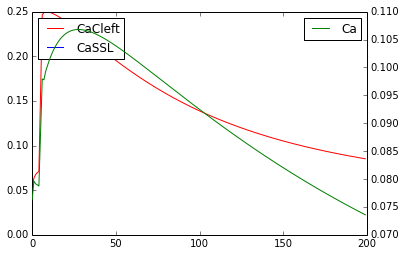

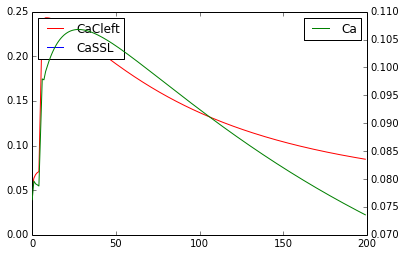

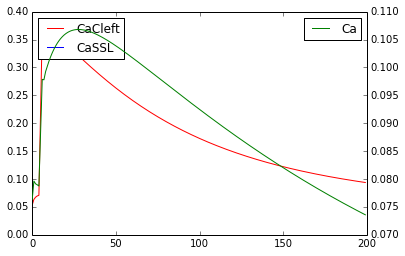

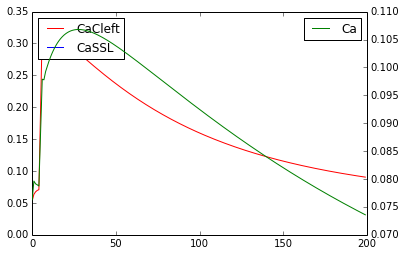

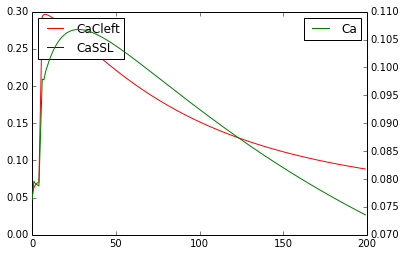

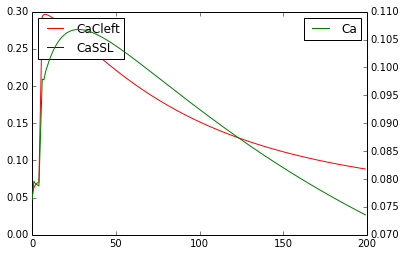

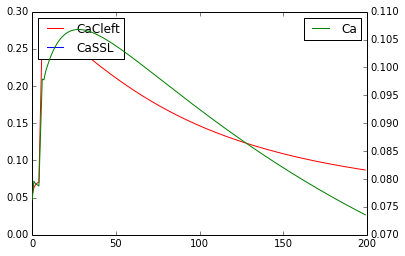

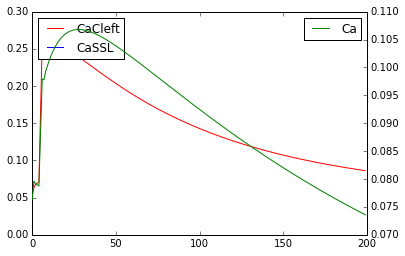

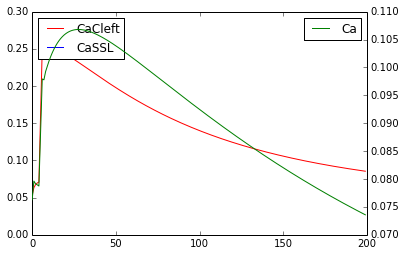

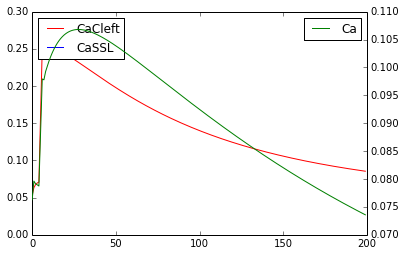

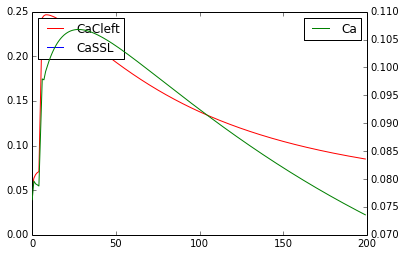

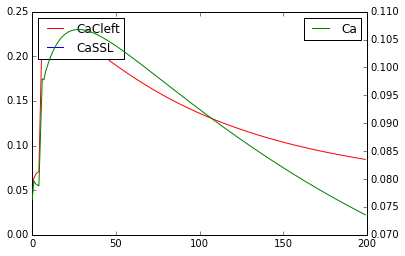

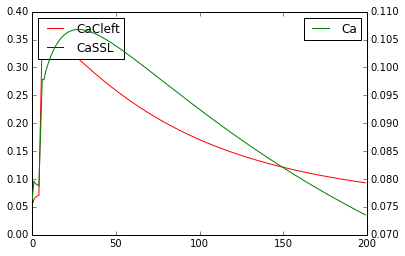

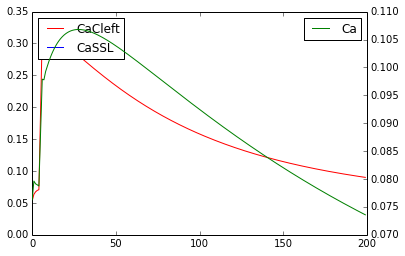

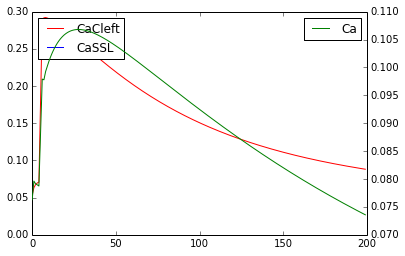

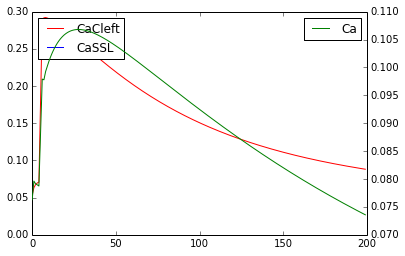

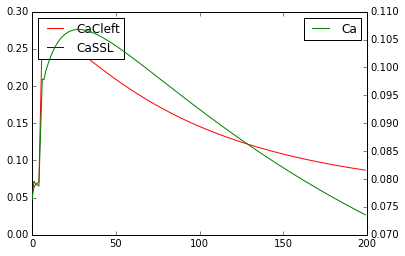

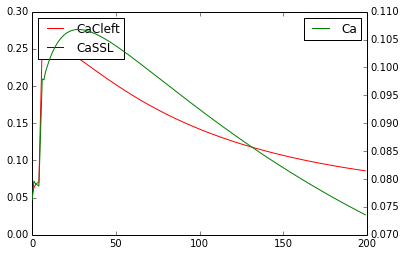

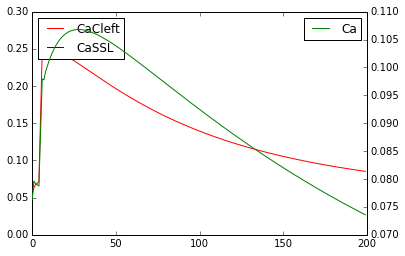

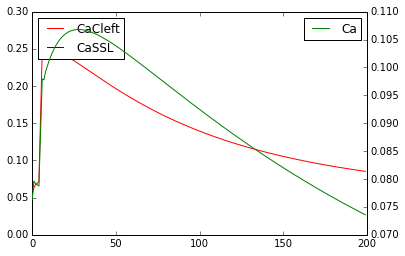

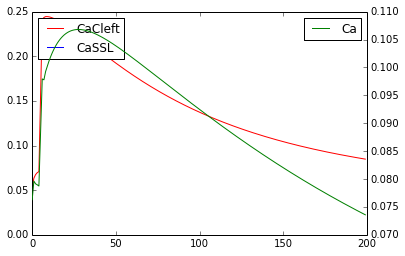

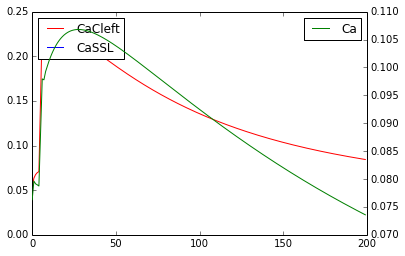

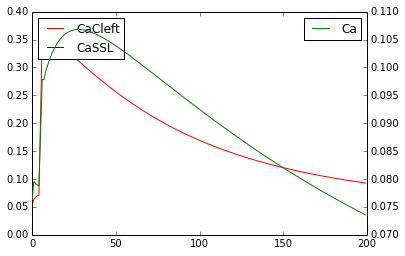

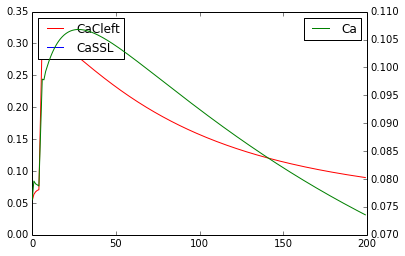

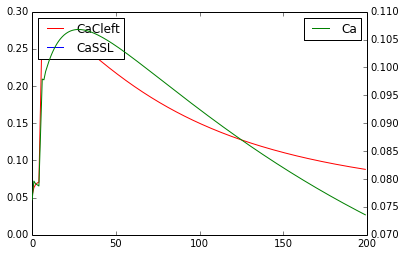

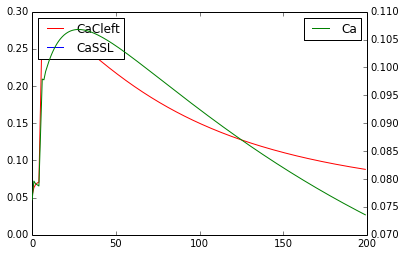

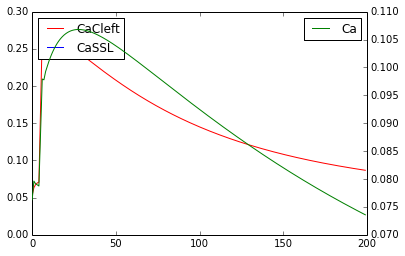

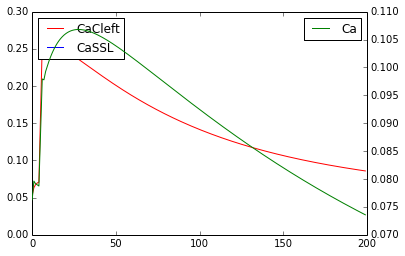

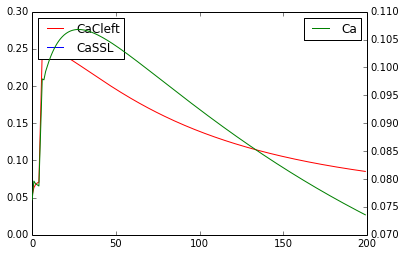

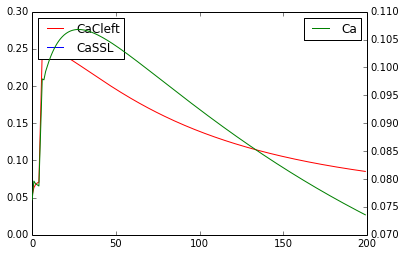

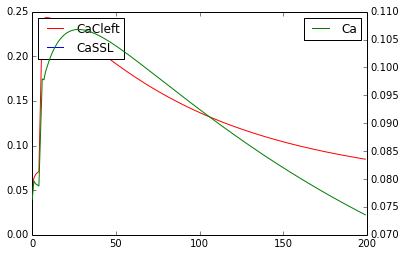

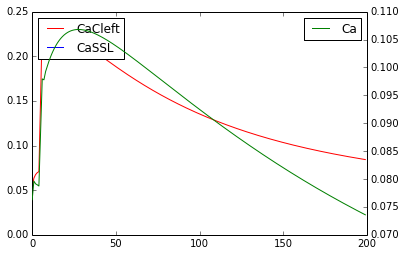

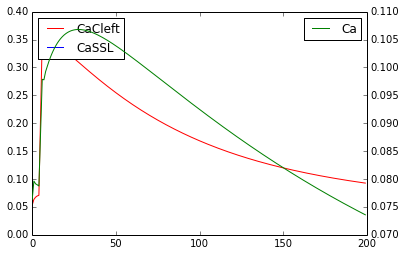

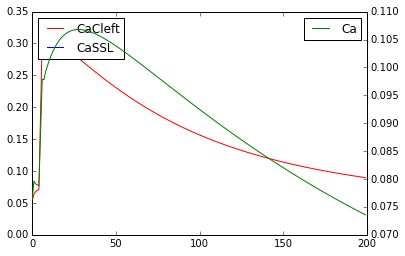

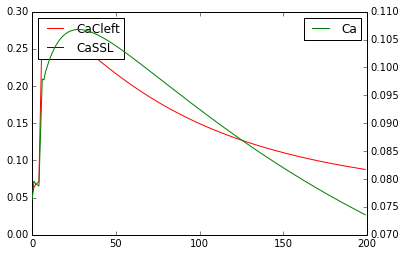

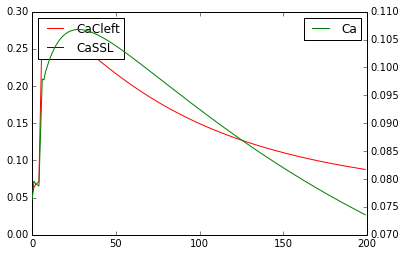

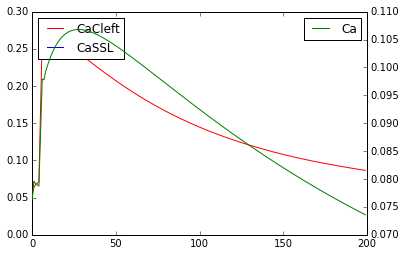

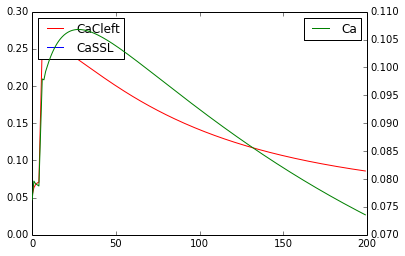

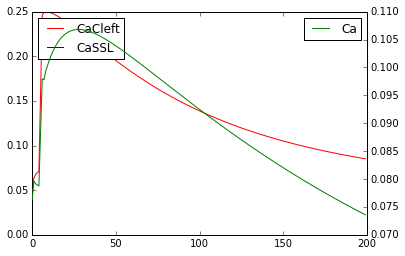

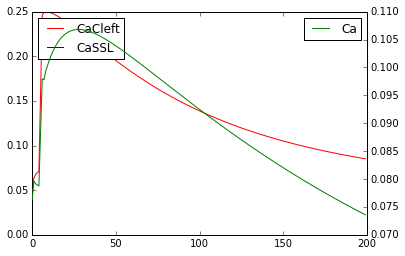

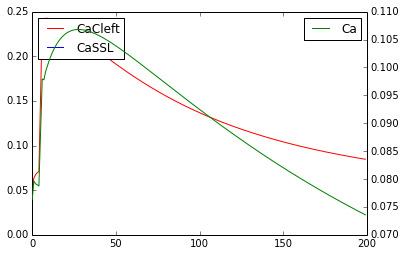

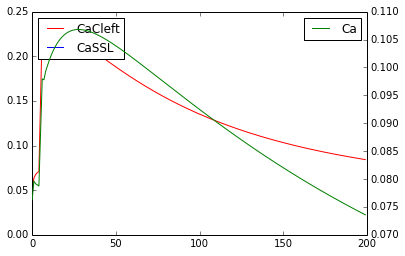

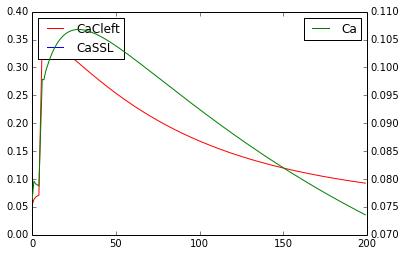

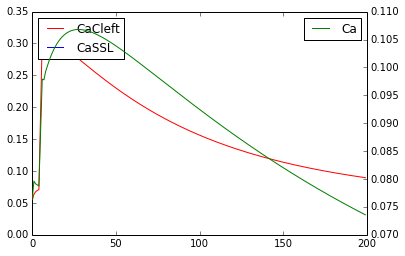

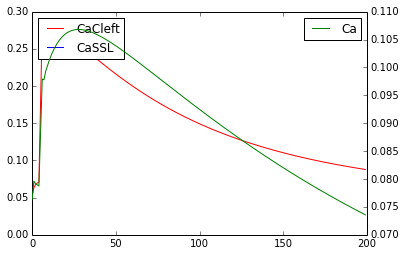

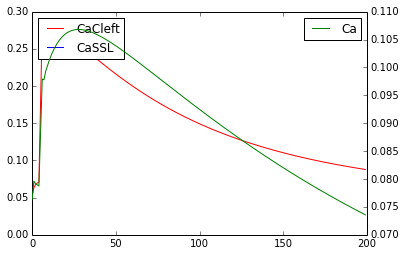

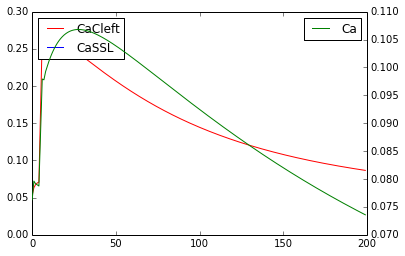

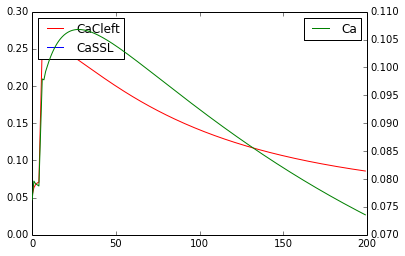

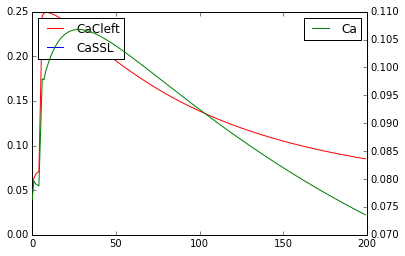

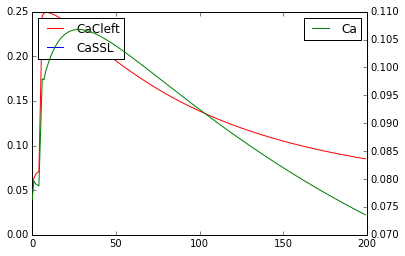

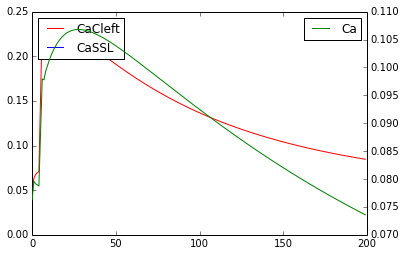

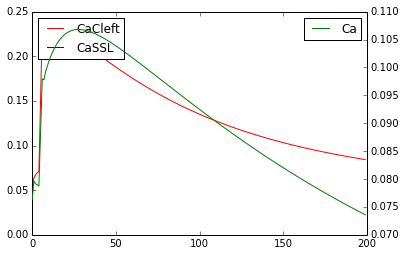

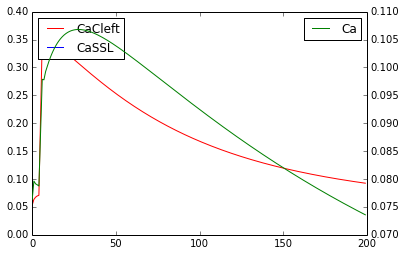

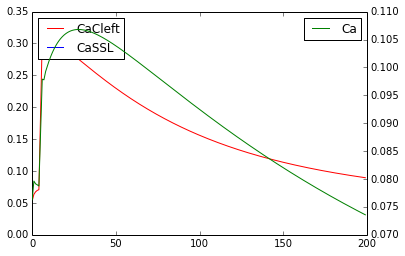

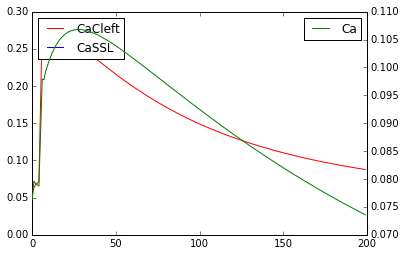

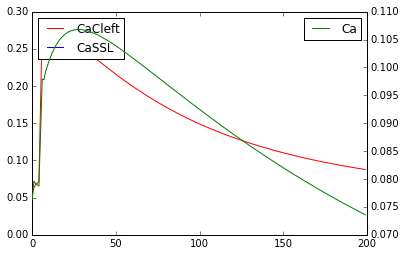

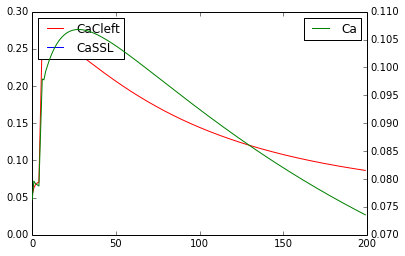

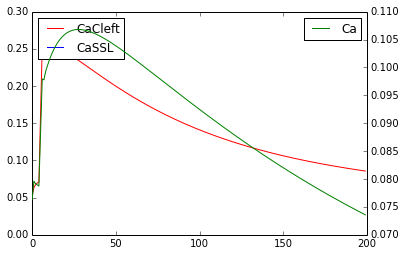

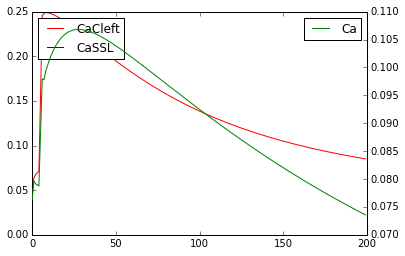

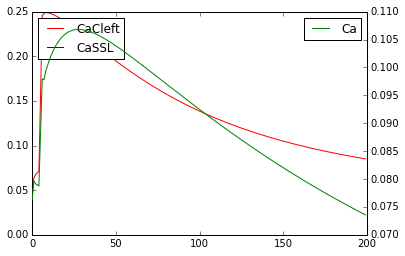

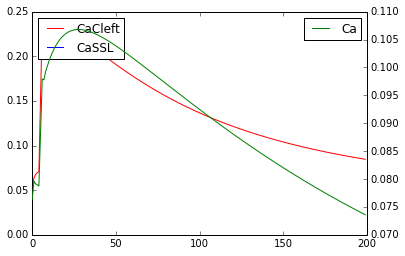

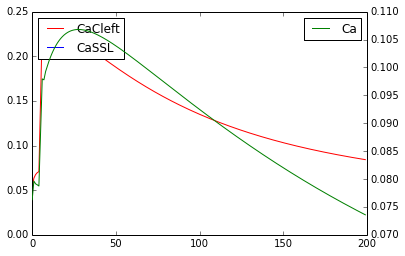

In [8]:
iters=10
phis=np.linspace(0.3,1.0,iters)
iters_k=10
Kds=np.linspace(-6,-4,iters_k)
#phis=[0.1,0.2,0.4,0.6,0.8,1.0]
print phis, Kds
#Kds=[-6,-5.5,-5,-4.5,-4]
Kds=10**Kds
dt= 5 #ms

lagt_matrix=np.zeros([iters,iters])
#print lagt_matrix

dt_matrix=np.zeros([iters,iters])
#print dt_matrix

dh_matrix=np.zeros([iters,iters])
#print lagt_matrix

#Kdi=0.0001
for i,Kdi in enumerate(Kds):
  for j,phij in enumerate(phis):
  #      j=0
  #      phij = phis[j]
        jobs = empty() # create container
     #   print "Kdi ", Kdi
     #   print "phij ", phij
        jobs.hdfName ="Des_otherDs_noSSL_%3.7f_%3.1f.h5"%(Kdi,phij)
     #   print jobs.hdfName
        jobs.ts,jobs.concsCaCleft,jobs.concsCaSSL,jobs.concsCa = analyze.ReadHdf(\
          jobs.hdfName,ssl=False)
      #  print jobs.concsCaCleft
      #  print jobs.concsCa
        
        jobs.concsCaCleft_maxt=np.argmax(jobs.concsCaCleft)
        jobs.concsCa_maxt=np.argmax(jobs.concsCa)
        
  #      print "Max Cleft t", jobs.concsCaCleft_maxt
  #      print "Max Cyt t", jobs.concsCa_maxt
        
        lagt_matrix[i,j]=jobs.concsCa_maxt-jobs.concsCaCleft_maxt
        dt_matrix[i,j]=lagt_matrix[i,j]*dt
  #      print "lag time ",dt_matrix 
        
        jobs.concsCaCleft_maxh=np.nanmax(jobs.concsCaCleft)
        jobs.concsCa_maxh=np.nanmax(jobs.concsCa)
        
  #      print "Max Cleft h", jobs.concsCaCleft_maxh
  #      print "Max Cyt h", jobs.concsCa_maxh
        
        dh_matrix[i,j]=jobs.concsCa_maxh/jobs.concsCaCleft_maxh
  #      print "dh ",dh_matrix  
        
        ax1 = plt.subplot()
        ax1.plot(jobs.ts,jobs.concsCaCleft,'r-',label="CaCleft")
        ax1.plot(jobs.ts,jobs.concsCaSSL,'b-',label="CaSSL")
        plt.legend(loc=2)
        ax2 = plt.twinx()
        ax2.plot(jobs.ts,jobs.concsCa,'g-',label="Ca") 
        
        
        plt.legend(loc=0)
        plt.figure()

[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ] [-6.         -5.77777778 -5.55555556 -5.33333333 -5.11111111 -4.88888889
 -4.66666667 -4.44444444 -4.22222222 -4.        ]
phij  0.1
Des_otherDs_noSSL_0.0000010_0.1.h5
[ 0.] [ 0.] [ 0.]
dh  [[ 0.09104757  0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.   

phij  0.8
Des_otherDs_noSSL_0.0000010_0.8.h5
[ 0.] [ 0.] [ 0.]
dh  [[ 0.09104757  0.1591747   0.21221373  0.25466183  0.2894014   0.31835743
   0.34272601  0.3634185   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0

phij  0.5
Des_otherDs_noSSL_0.0000017_0.5.h5
[ 0.] [ 0.] [ 0.]
dh  [[ 0.09104757  0.1591747   0.21221373  0.25466183  0.2894014   0.31835743
   0.34272601  0.3634185   0.38132622  0.3969763 ]
 [ 0.10910583  0.18511289  0.24119664  0.28427386  0.31839851  0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0

phij  0.2
Des_otherDs_noSSL_0.0000028_0.2.h5
[ 0.] [ 0.] [ 0.]
dh  [[ 0.09104757  0.1591747   0.21221373  0.25466183  0.2894014   0.31835743
   0.34272601  0.3634185   0.38132622  0.3969763 ]
 [ 0.10910583  0.18511289  0.24119664  0.28427386  0.31839851  0.34591522
   0.36849683  0.38746869  0.40363282  0.41757008]
 [ 0.12385088  0.20516114  0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.   

phij  0.9
Des_otherDs_noSSL_0.0000028_0.9.h5
[ 0.] [ 0.] [ 0.]
dh  [[ 0.09104757  0.1591747   0.21221373  0.25466183  0.2894014   0.31835743
   0.34272601  0.3634185   0.38132622  0.3969763 ]
 [ 0.10910583  0.18511289  0.24119664  0.28427386  0.31839851  0.34591522
   0.36849683  0.38746869  0.40363282  0.41757008]
 [ 0.12385088  0.20516114  0.26270889  0.30557722  0.33866801  0.36470248
   0.38589296  0.40347701  0.41830371  0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.       

phij  0.6
Des_otherDs_noSSL_0.0000046_0.6.h5
[ 0.] [ 0.] [ 0.]
dh  [[ 0.09104757  0.1591747   0.21221373  0.25466183  0.2894014   0.31835743
   0.34272601  0.3634185   0.38132622  0.3969763 ]
 [ 0.10910583  0.18511289  0.24119664  0.28427386  0.31839851  0.34591522
   0.36849683  0.38746869  0.40363282  0.41757008]
 [ 0.12385088  0.20516114  0.26270889  0.30557722  0.33866801  0.36470248
   0.38589296  0.40347701  0.41830371  0.43097504]
 [ 0.13477734  0.21940879  0.27755015  0.31995204  0.35196992  0.37697699
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0

phij  0.3
Des_otherDs_noSSL_0.0000077_0.3.h5
[ 0.] [ 0.] [ 0.]
dh  [[ 0.09104757  0.1591747   0.21221373  0.25466183  0.2894014   0.31835743
   0.34272601  0.3634185   0.38132622  0.3969763 ]
 [ 0.10910583  0.18511289  0.24119664  0.28427386  0.31839851  0.34591522
   0.36849683  0.38746869  0.40363282  0.41757008]
 [ 0.12385088  0.20516114  0.26270889  0.30557722  0.33866801  0.36470248
   0.38589296  0.40347701  0.41830371  0.43097504]
 [ 0.13477734  0.21940879  0.27755015  0.31995204  0.35196992  0.37697699
   0.39713277  0.4137249   0.42762239  0.43940759]
 [ 0.14230631  0.2289409   0.28727988  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0

phij  1.0
Des_otherDs_noSSL_0.0000077_1.0.h5
[ 0.] [ 0.] [ 0.]
dh  [[ 0.09104757  0.1591747   0.21221373  0.25466183  0.2894014   0.31835743
   0.34272601  0.3634185   0.38132622  0.3969763 ]
 [ 0.10910583  0.18511289  0.24119664  0.28427386  0.31839851  0.34591522
   0.36849683  0.38746869  0.40363282  0.41757008]
 [ 0.12385088  0.20516114  0.26270889  0.30557722  0.33866801  0.36470248
   0.38589296  0.40347701  0.41830371  0.43097504]
 [ 0.13477734  0.21940879  0.27755015  0.31995204  0.35196992  0.37697699
   0.39713277  0.4137249   0.42762239  0.43940759]
 [ 0.14230631  0.2289409   0.28727988  0.32923715  0.36045744  0.38473992
   0.40419071  0.42012222  0.43341104  0.44456688]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.         

phij  0.7
Des_otherDs_noSSL_0.0000129_0.7.h5
[ 0.] [ 0.] [ 0.]
dh  [[ 0.09104757  0.1591747   0.21221373  0.25466183  0.2894014   0.31835743
   0.34272601  0.3634185   0.38132622  0.3969763 ]
 [ 0.10910583  0.18511289  0.24119664  0.28427386  0.31839851  0.34591522
   0.36849683  0.38746869  0.40363282  0.41757008]
 [ 0.12385088  0.20516114  0.26270889  0.30557722  0.33866801  0.36470248
   0.38589296  0.40347701  0.41830371  0.43097504]
 [ 0.13477734  0.21940879  0.27755015  0.31995204  0.35196992  0.37697699
   0.39713277  0.4137249   0.42762239  0.43940759]
 [ 0.14230631  0.2289409   0.28727988  0.32923715  0.36045744  0.38473992
   0.40419071  0.42012222  0.43341104  0.44456688]
 [ 0.14723808  0.23506327  0.29344697  0.33503735  0.36574479  0.389549
   0.40854357  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.   

phij  0.4
Des_otherDs_noSSL_0.0000215_0.4.h5
[ 0.] [ 0.] [ 0.]
dh  [[ 0.09104757  0.1591747   0.21221373  0.25466183  0.2894014   0.31835743
   0.34272601  0.3634185   0.38132622  0.3969763 ]
 [ 0.10910583  0.18511289  0.24119664  0.28427386  0.31839851  0.34591522
   0.36849683  0.38746869  0.40363282  0.41757008]
 [ 0.12385088  0.20516114  0.26270889  0.30557722  0.33866801  0.36470248
   0.38589296  0.40347701  0.41830371  0.43097504]
 [ 0.13477734  0.21940879  0.27755015  0.31995204  0.35196992  0.37697699
   0.39713277  0.4137249   0.42762239  0.43940759]
 [ 0.14230631  0.2289409   0.28727988  0.32923715  0.36045744  0.38473992
   0.40419071  0.42012222  0.43341104  0.44456688]
 [ 0.14723808  0.23506327  0.29344697  0.33503735  0.36574479  0.389549
   0.40854357  0.42405325  0.43695723  0.44771855]
 [ 0.15036232  0.2388932   0.29727272  0.33858273  0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.   

phij  0.1
Des_otherDs_noSSL_0.0000359_0.1.h5
[ 0.] [ 0.] [ 0.]
dh  [[ 0.09104757  0.1591747   0.21221373  0.25466183  0.2894014   0.31835743
   0.34272601  0.3634185   0.38132622  0.3969763 ]
 [ 0.10910583  0.18511289  0.24119664  0.28427386  0.31839851  0.34591522
   0.36849683  0.38746869  0.40363282  0.41757008]
 [ 0.12385088  0.20516114  0.26270889  0.30557722  0.33866801  0.36470248
   0.38589296  0.40347701  0.41830371  0.43097504]
 [ 0.13477734  0.21940879  0.27755015  0.31995204  0.35196992  0.37697699
   0.39713277  0.4137249   0.42762239  0.43940759]
 [ 0.14230631  0.2289409   0.28727988  0.32923715  0.36045744  0.38473992
   0.40419071  0.42012222  0.43341104  0.44456688]
 [ 0.14723808  0.23506327  0.29344697  0.33503735  0.36574479  0.389549
   0.40854357  0.42405325  0.43695723  0.44771855]
 [ 0.15036232  0.2388932   0.29727272  0.33858273  0.36898955  0.3924901
   0.41119835  0.42644538  0.43909018  0.44962954]
 [ 0.15229976  0.          0.          0.          0.        

phij  0.8
Des_otherDs_noSSL_0.0000359_0.8.h5
[ 0.] [ 0.] [ 0.]
dh  [[ 0.09104757  0.1591747   0.21221373  0.25466183  0.2894014   0.31835743
   0.34272601  0.3634185   0.38132622  0.3969763 ]
 [ 0.10910583  0.18511289  0.24119664  0.28427386  0.31839851  0.34591522
   0.36849683  0.38746869  0.40363282  0.41757008]
 [ 0.12385088  0.20516114  0.26270889  0.30557722  0.33866801  0.36470248
   0.38589296  0.40347701  0.41830371  0.43097504]
 [ 0.13477734  0.21940879  0.27755015  0.31995204  0.35196992  0.37697699
   0.39713277  0.4137249   0.42762239  0.43940759]
 [ 0.14230631  0.2289409   0.28727988  0.32923715  0.36045744  0.38473992
   0.40419071  0.42012222  0.43341104  0.44456688]
 [ 0.14723808  0.23506327  0.29344697  0.33503735  0.36574479  0.389549
   0.40854357  0.42405325  0.43695723  0.44771855]
 [ 0.15036232  0.2388932   0.29727272  0.33858273  0.36898955  0.3924901
   0.41119835  0.42644538  0.43909018  0.44962954]
 [ 0.15229976  0.24124966  0.29961443  0.34074434  0.37096249

Exception: std::bad_alloc

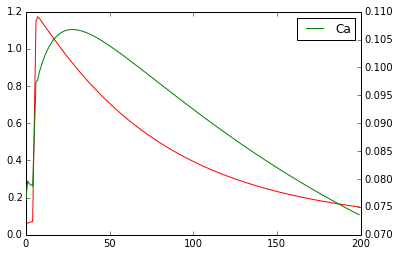

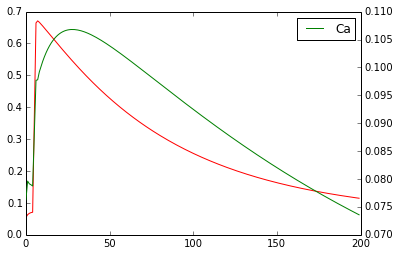

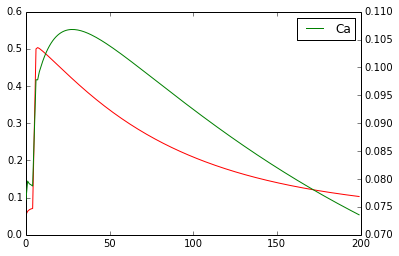

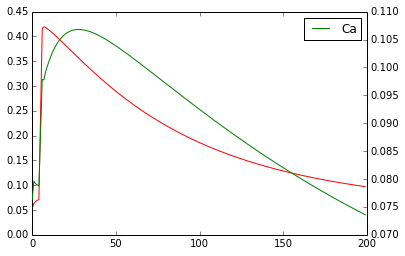

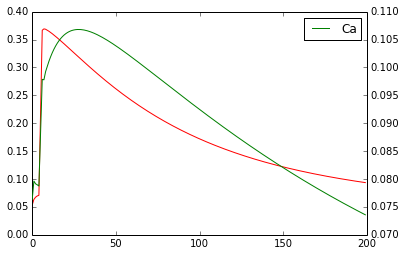

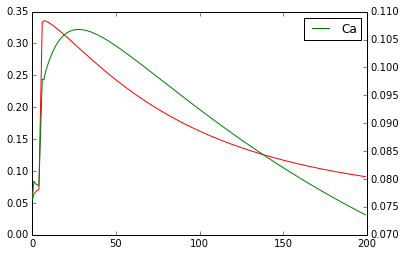

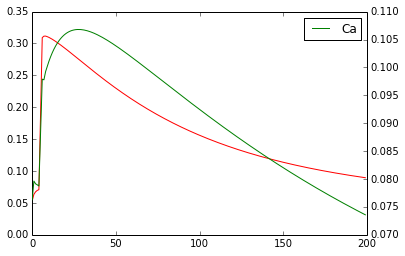

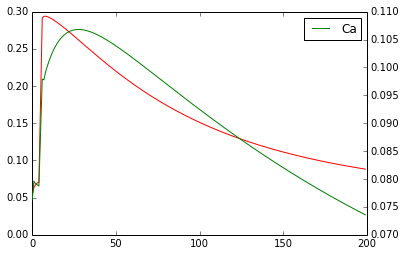

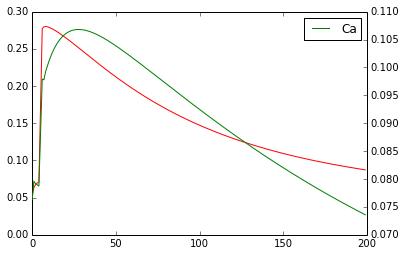

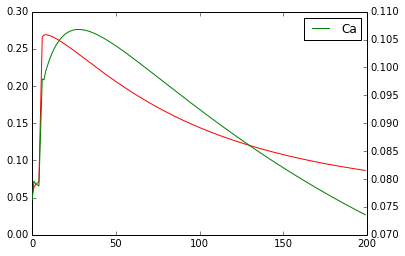

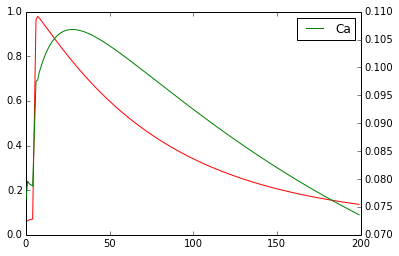

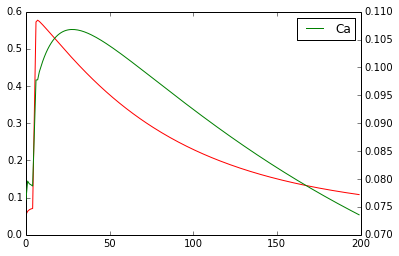

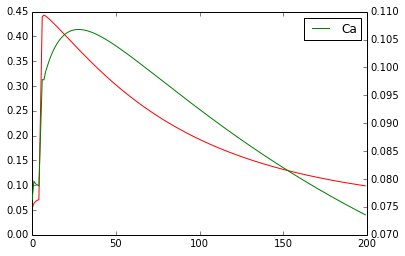

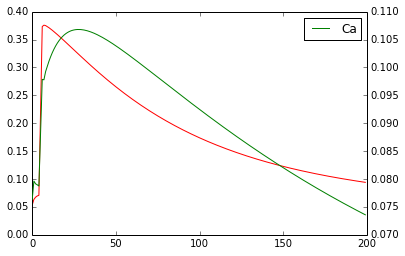

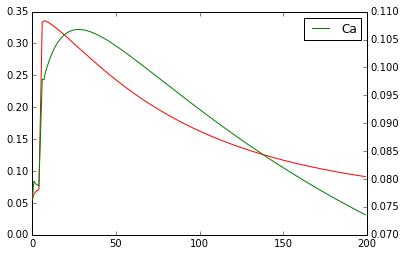

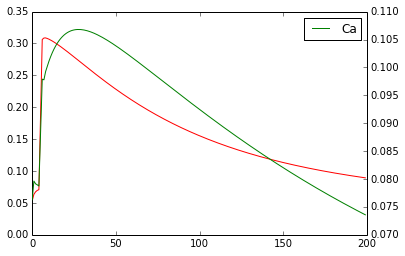

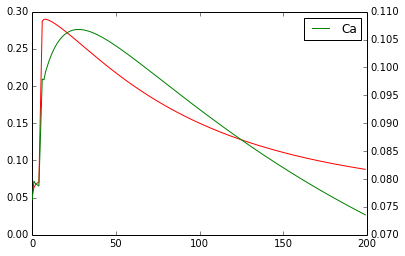

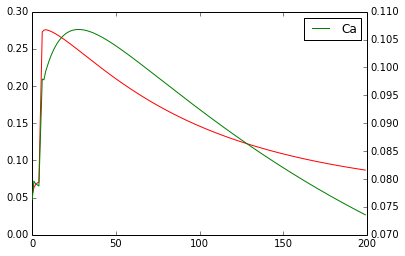

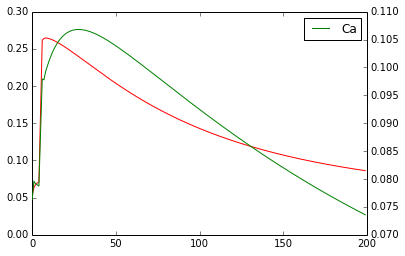

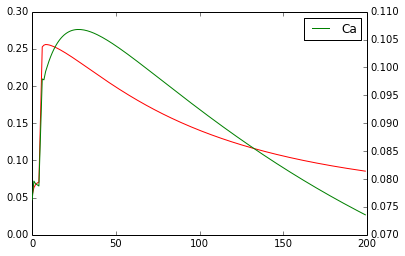

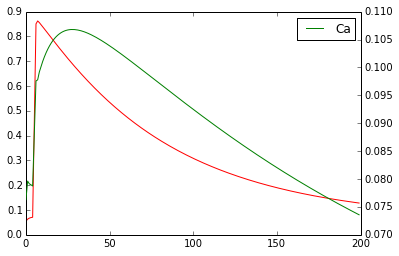

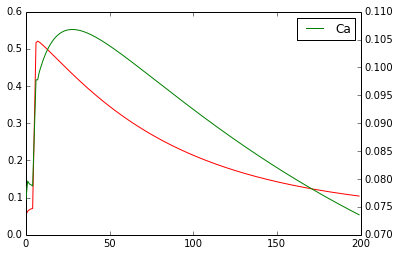

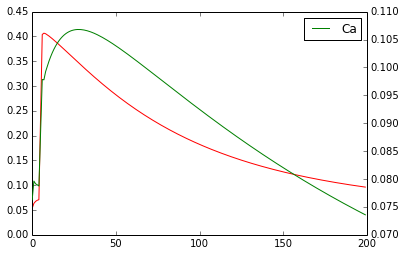

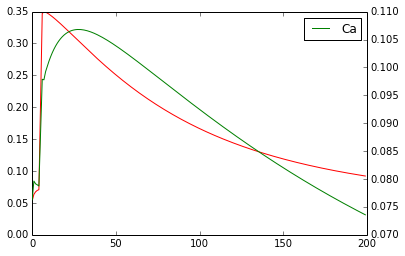

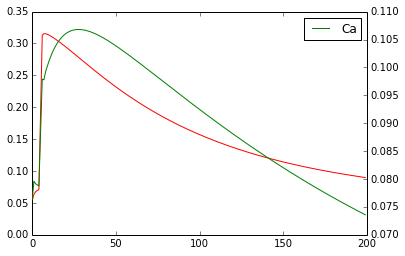

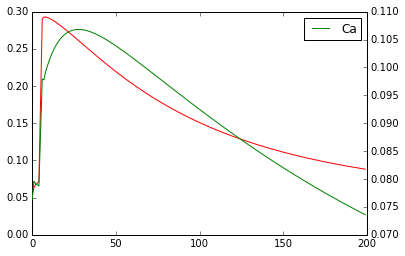

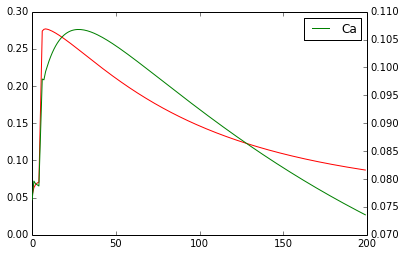

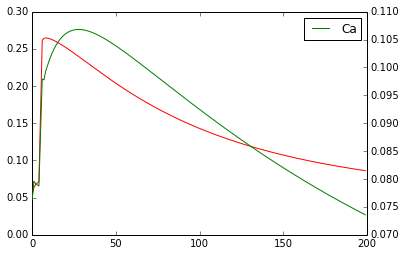

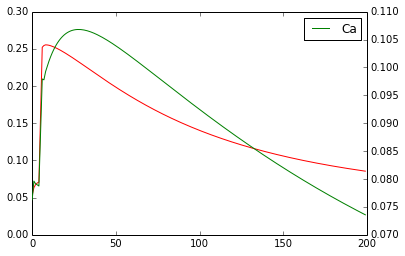

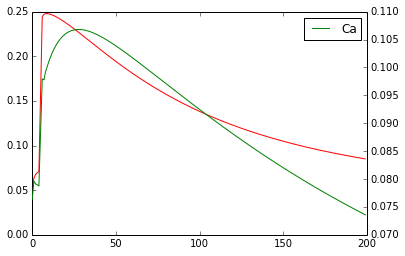

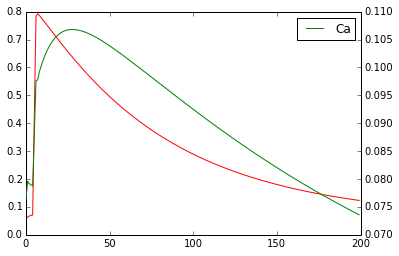

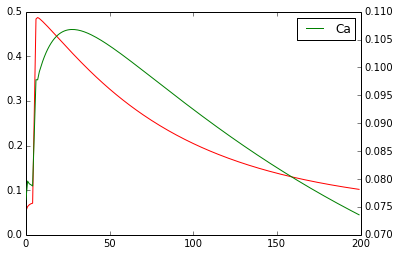

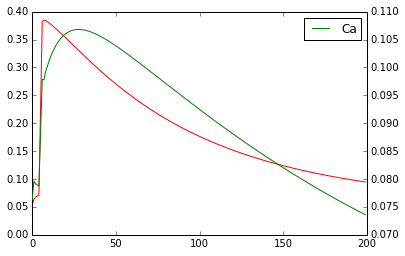

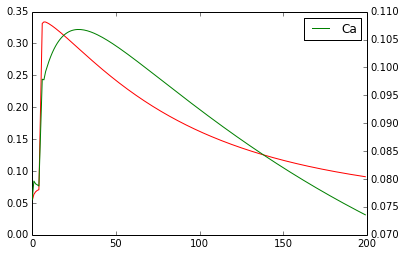

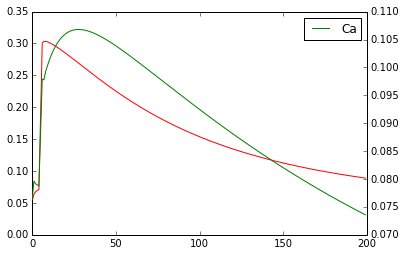

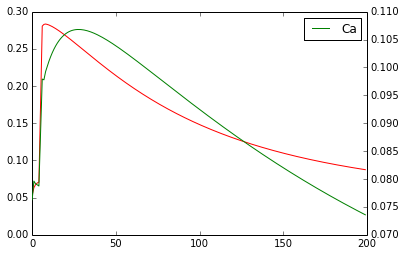

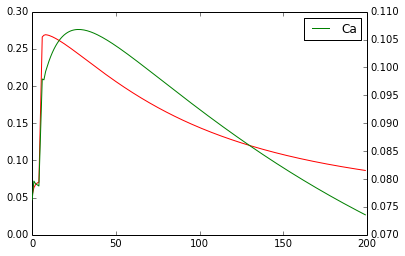

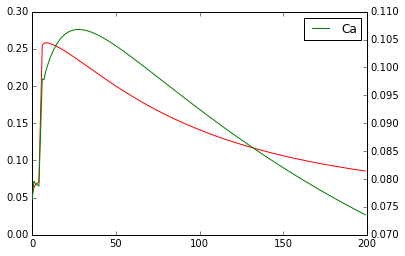

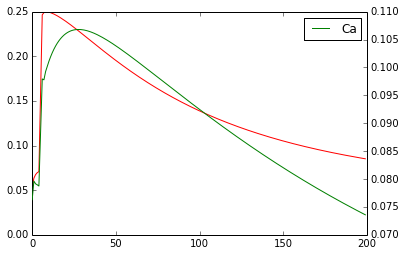

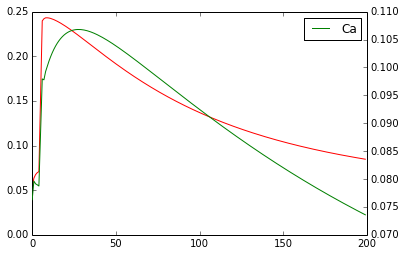

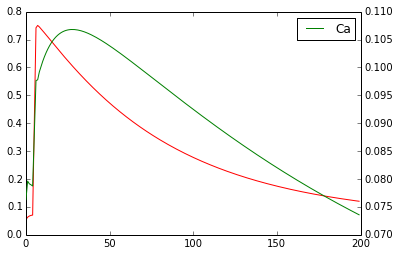

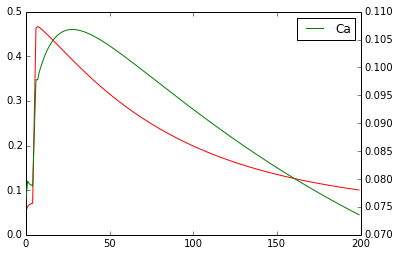

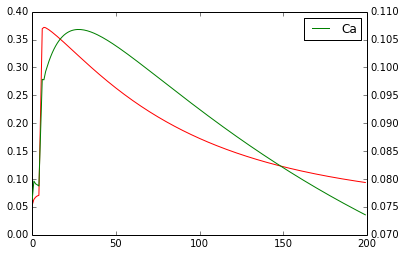

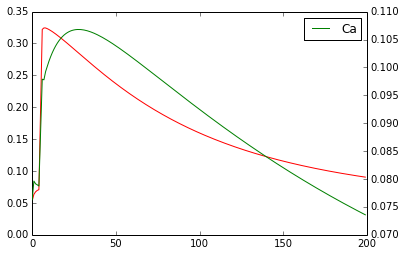

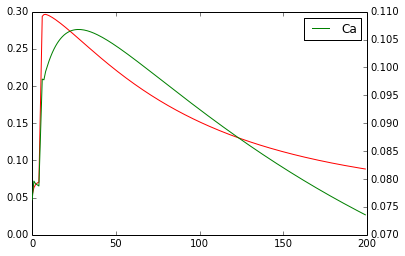

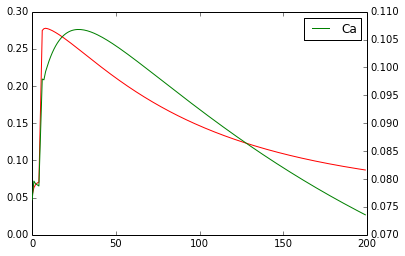

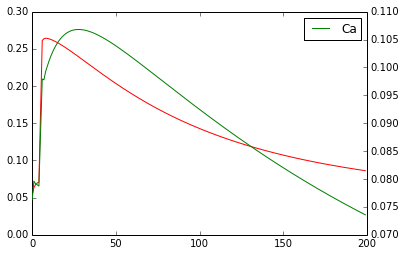

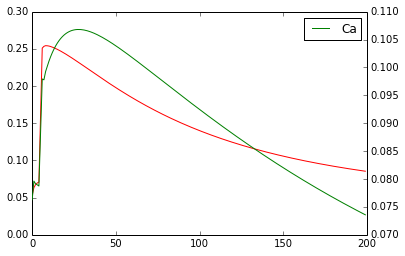

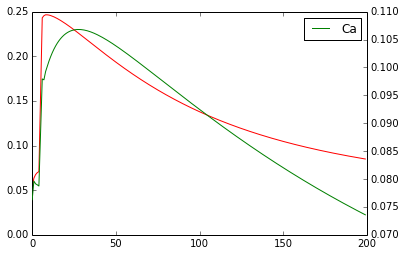

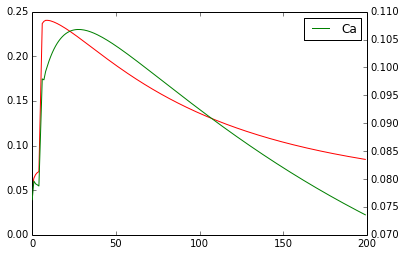

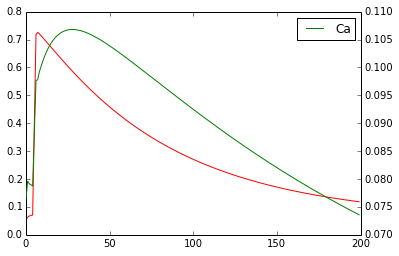

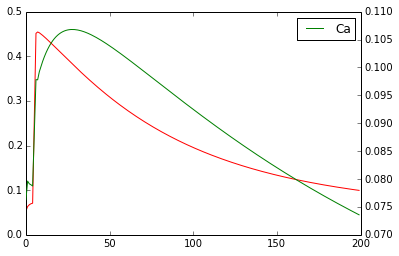

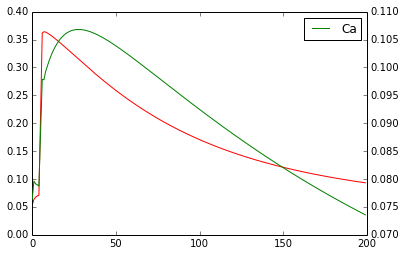

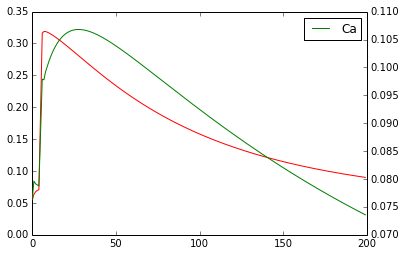

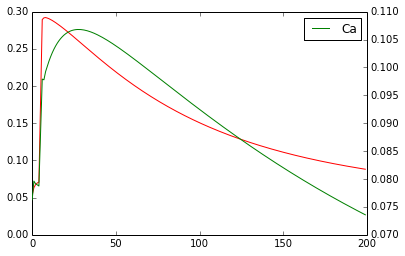

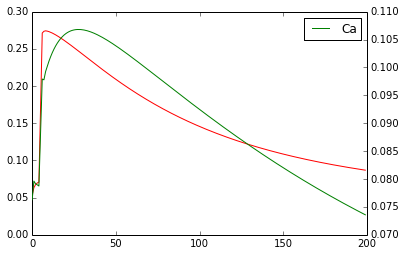

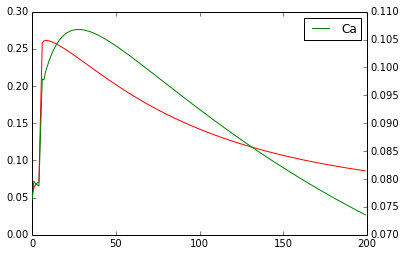

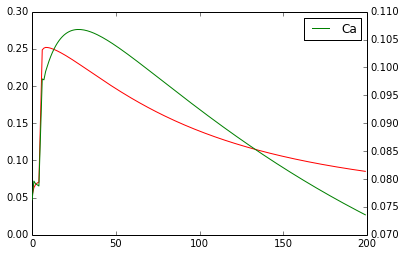

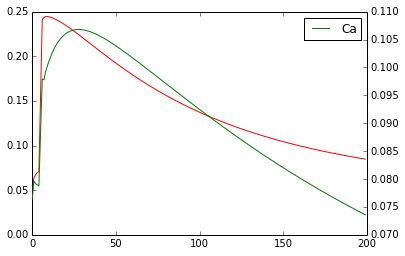

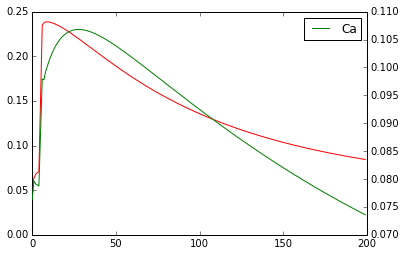

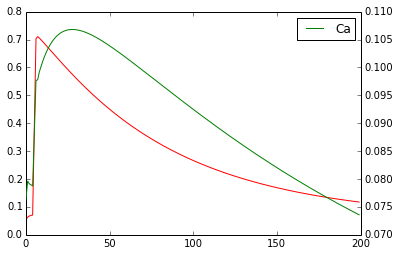

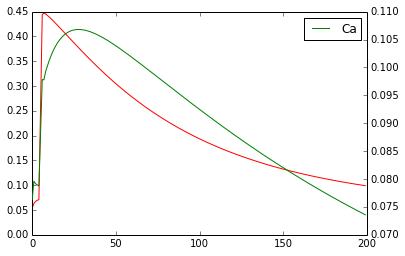

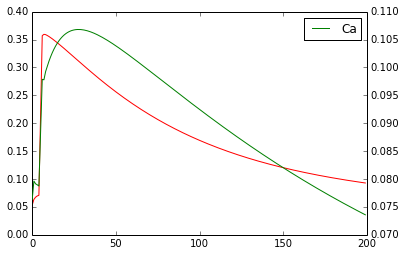

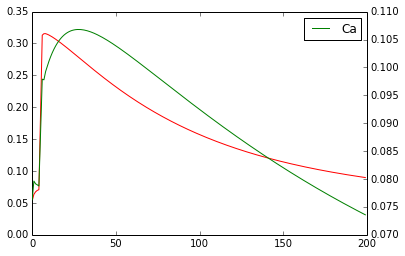

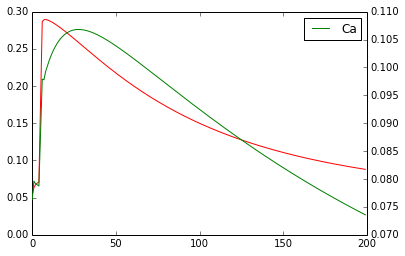

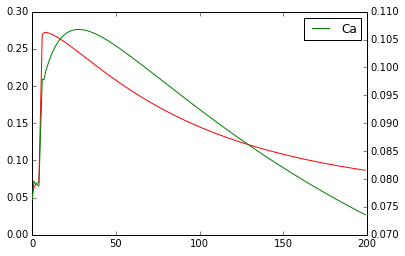

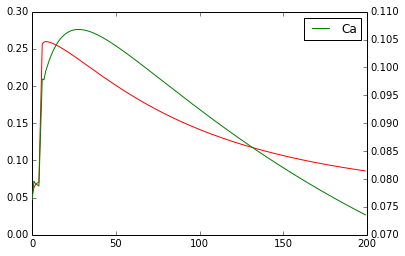

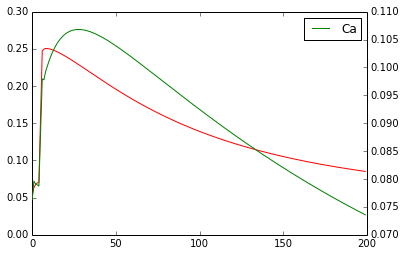

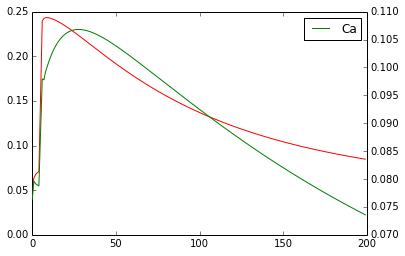

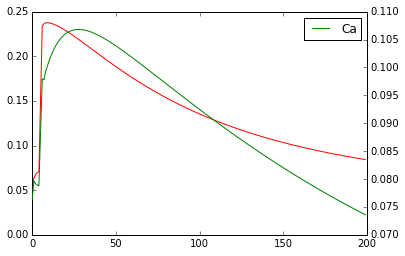

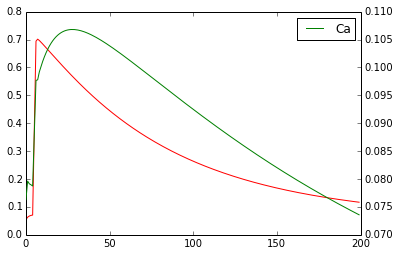

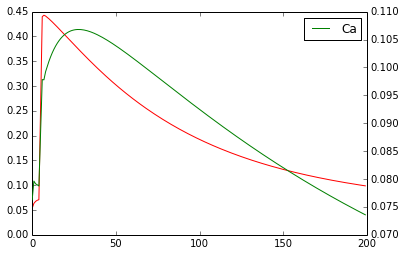

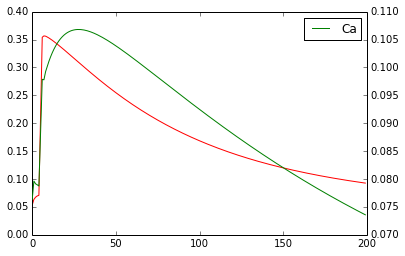

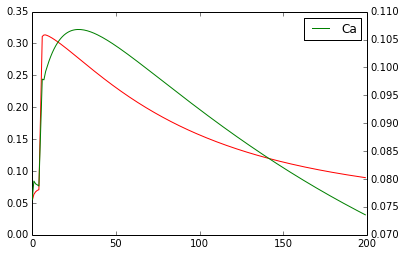

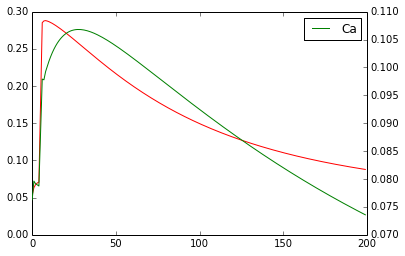

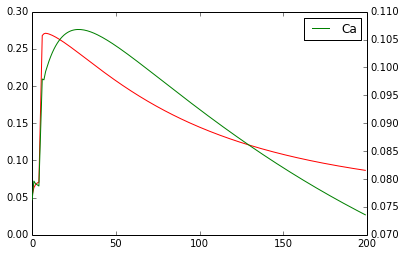

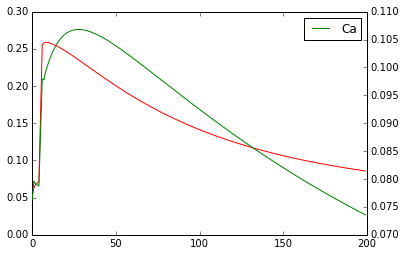

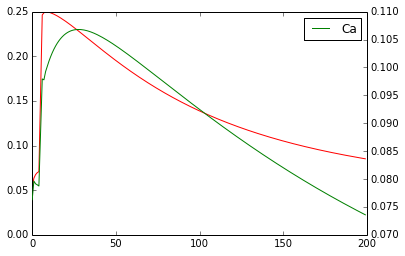

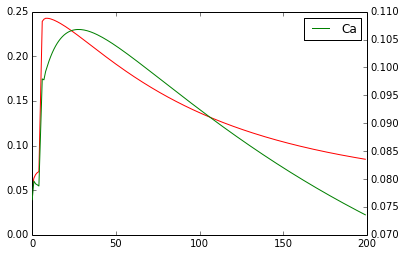

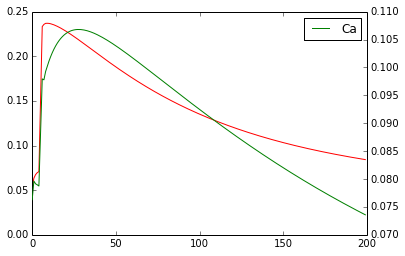

In [12]:
iters=10
phis=np.linspace(0.1,1.0,iters)
iters_k=10
Kds=np.linspace(-6,-4,iters)
#phis=[0.1,0.2,0.4,0.6,0.8,1.0]
print phis, Kds
#Kds=[-6,-5.5,-5,-4.5,-4]
Kds=10**Kds
dt= 5 #ms

lagt_matrix=np.zeros([iters,iters])
#print lagt_matrix

dt_matrix=np.zeros([iters,iters])
#print dt_matrix

dh_matrix=np.zeros([iters,iters])
#print lagt_matrix

#Kdi=0.0001
for i,Kdi in enumerate(Kds):
  for j,phij in enumerate(phis):
  #      j=0
  #      phij = phis[j]
        jobs = empty() # create container
     #   print "Kdi ", Kdi
        print "phij ", phij
        jobs.hdfName ="Des_otherDs_noSSL_%3.7f_%3.1f.h5"%(Kdi,phij)
        print jobs.hdfName
        jobs.ts,jobs.concsCaCleft,jobs.concsCaSSL,jobs.concsCa = analyze.ReadHdf(\
          jobs.hdfName,ssl=False)
      #  print jobs.concsCaCleft
      #  print jobs.concsCa
        
        jobs.concsCaCleft_maxt=np.argmax(jobs.concsCaCleft)
        jobs.concsCa_maxt=np.argmax(jobs.concsCa)
        
  #      print "Max Cleft t", jobs.concsCaCleft_maxt
  #      print "Max Cyt t", jobs.concsCa_maxt
        
        lagt_matrix[i,j]=jobs.concsCa_maxt-jobs.concsCaCleft_maxt
        dt_matrix[i,j]=lagt_matrix[i,j]*dt
     #   print "lag time ",dt_matrix 
        
        jobs.concsCaCleft_maxh=np.nanmax(jobs.concsCaCleft)
        jobs.concsCa_maxh=np.nanmax(jobs.concsCa)
        
  #      print "Max Cleft h", jobs.concsCaCleft_maxh
  #      print "Max Cyt h", jobs.concsCa_maxh
        
        dh_matrix[i,j]=jobs.concsCa_maxh/jobs.concsCaCleft_maxh
  #      print "dh ",dh_matrix  
        
        ax1 = plt.subplot()
        ax1.plot(jobs.ts,jobs.concsCaCleft,'r-',label="CaCleft")
        ax1.plot(jobs.ts,jobs.concsCaSSL,'b-',label="CaSSL")
        ax2 = plt.twinx()
        ax2.plot(jobs.ts,jobs.concsCa,'g-',label="Ca") 
        
        
        plt.legend(loc=0)
        plt.figure()

In [7]:
dh_matrix[:,0]

array([ 0.09104757,  0.10910583,  0.12385088,  0.13477734,  0.14230631,
        0.14723808,  0.15036232,  0.15229976,  0.1534854 ,  0.15420508])

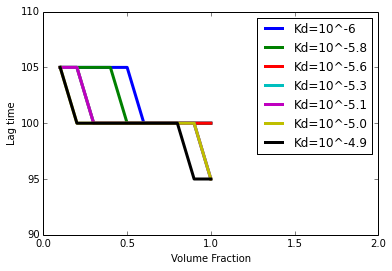

In [23]:
x = np.linspace(0.1,1.,10)
plt.plot(x,dt_matrix[0,:],label="Kd=10^-6",linewidth=3.0)
plt.plot(x,dt_matrix[1,:],label="Kd=10^-5.8",linewidth=3.0)
plt.plot(x,dt_matrix[2,:],label="Kd=10^-5.6",linewidth=3.0)
plt.plot(x,dt_matrix[3,:],label="Kd=10^-5.3",linewidth=3.0)
plt.plot(x,dt_matrix[4,:],label="Kd=10^-5.1",linewidth=3.0)
plt.plot(x,dt_matrix[5,:],label="Kd=10^-5.0",linewidth=3.0)
plt.plot(x,dt_matrix[6,:],label="Kd=10^-4.9",linewidth=3.0)
#plt.plot(x,dt_matrix[7,:],label="Kd=10^-4.7",linewidth=3.0)
#plt.plot(x,dt_matrix[8,:],label="Kd=10^-4.4",linewidth=3.0)
#plt.plot(x,dt_matrix[9,:],label="Kd=10^-4.2",linewidth=3.0)

plt.xlabel('Volume Fraction')
plt.ylim([90,110])
plt.xlim([0,2.0])
#plt.xscale('log')
plt.ylabel('Lag time')
plt.legend(loc='best')

plt.gcf().savefig('phi_dt_noSSL.png')

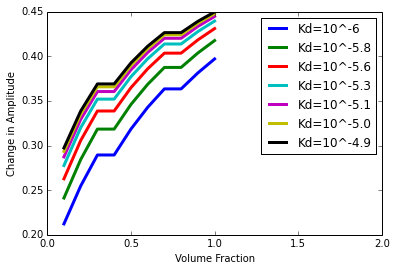

In [25]:
x = np.linspace(0.1,1.,10)
plt.plot(x,dh_matrix[0,:],label="Kd=10^-6",linewidth=3.0)
plt.plot(x,dh_matrix[1,:],label="Kd=10^-5.8",linewidth=3.0)
plt.plot(x,dh_matrix[2,:],label="Kd=10^-5.6",linewidth=3.0)
plt.plot(x,dh_matrix[3,:],label="Kd=10^-5.3",linewidth=3.0)
plt.plot(x,dh_matrix[4,:],label="Kd=10^-5.1",linewidth=3.0)
plt.plot(x,dh_matrix[5,:],label="Kd=10^-5.0",linewidth=3.0)
plt.plot(x,dh_matrix[6,:],label="Kd=10^-4.9",linewidth=3.0)
#plt.plot(x,dh_matrix[7,:],label="Kd=10^-4.7",linewidth=3.0)
#plt.plot(x,dh_matrix[8,:],label="Kd=10^-4.4",linewidth=3.0)
#plt.plot(x,dh_matrix[9,:],label="Kd=10^-4.2",linewidth=3.0)

plt.xlabel('Volume Fraction')
#plt.ylim([90,110])
plt.xlim([0,2.0])
plt.ylabel('Change in Amplitude')
plt.legend(loc='best')

plt.gcf().savefig('phi_dh_noSSL.png')

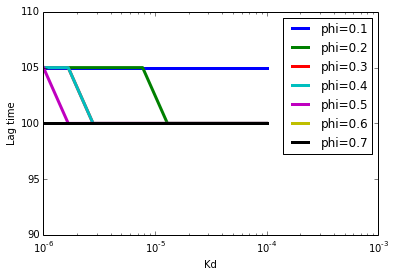

In [22]:
x = np.linspace(-6,-4,10)
x=10**x
plt.plot(x,dt_matrix[:,0],label="phi=0.1",linewidth=3.0)
plt.plot(x,dt_matrix[:,1],label="phi=0.2",linewidth=3.0)
plt.plot(x,dt_matrix[:,2],label="phi=0.3",linewidth=3.0)
plt.plot(x,dt_matrix[:,3],label="phi=0.4",linewidth=3.0)
plt.plot(x,dt_matrix[:,4],label="phi=0.5",linewidth=3.0)
plt.plot(x,dt_matrix[:,5],label="phi=0.6",linewidth=3.0)
plt.plot(x,dt_matrix[:,6],label="phi=0.7",linewidth=3.0)
#plt.plot(x,dt_matrix[:,7],label="phi=0.8",linewidth=3.0)
#plt.plot(x,dt_matrix[:,8],label="phi=0.9",linewidth=3.0)
#plt.plot(x,dt_matrix[:,9],label="phi=1.0",linewidth=3.0)

plt.xlabel('Kd')
plt.ylim([90,110])
plt.xlim([10**-6,10**-3])
plt.xscale('log')
plt.ylabel('Lag time')
plt.legend(loc='best')

plt.gcf().savefig('kd_dt_noSSL.png')

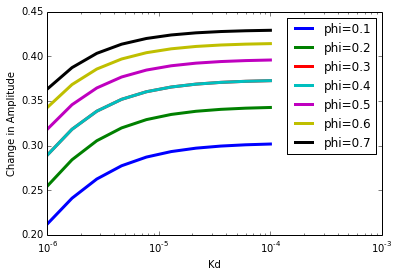

In [24]:
x = np.linspace(-6,-4,10)
x=10**x
plt.plot(x,dh_matrix[:,0],label="phi=0.1",linewidth=3.0)
plt.plot(x,dh_matrix[:,1],label="phi=0.2",linewidth=3.0)
plt.plot(x,dh_matrix[:,2],label="phi=0.3",linewidth=3.0)
plt.plot(x,dh_matrix[:,3],label="phi=0.4",linewidth=3.0)
plt.plot(x,dh_matrix[:,4],label="phi=0.5",linewidth=3.0)
plt.plot(x,dh_matrix[:,5],label="phi=0.6",linewidth=3.0)
plt.plot(x,dh_matrix[:,6],label="phi=0.7",linewidth=3.0)
#plt.plot(x,dh_matrix[:,7],label="phi=0.8",linewidth=3.0)
#plt.plot(x,dh_matrix[:,8],label="phi=0.9",linewidth=3.0)
#plt.plot(x,dh_matrix[:,9],label="phi=1.0",linewidth=3.0)

plt.xlabel('Kd')
#plt.ylim([90,110])
#plt.xlim([0,2.0])
plt.xlim([10**-6,10**-3])
plt.xscale('log')
plt.ylabel('Change in Amplitude')
plt.legend(loc='best')

plt.gcf().savefig('kd_dh_noSSL.png')